In [53]:
#Carga de las librerías necesarias

import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report


In [54]:
#Visualización del set de datos

df = pd.read_csv("Cleaned-Data.csv")
df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Fever                    316800 non-null  int64 
 1   Tiredness                316800 non-null  int64 
 2   Dry-Cough                316800 non-null  int64 
 3   Difficulty-in-Breathing  316800 non-null  int64 
 4   Sore-Throat              316800 non-null  int64 
 5   None_Sympton             316800 non-null  int64 
 6   Pains                    316800 non-null  int64 
 7   Nasal-Congestion         316800 non-null  int64 
 8   Runny-Nose               316800 non-null  int64 
 9   Diarrhea                 316800 non-null  int64 
 10  None_Experiencing        316800 non-null  int64 
 11  Age_0-9                  316800 non-null  int64 
 12  Age_10-19                316800 non-null  int64 
 13  Age_20-24                316800 non-null  int64 
 14  Age_25-59           

<Axes: >

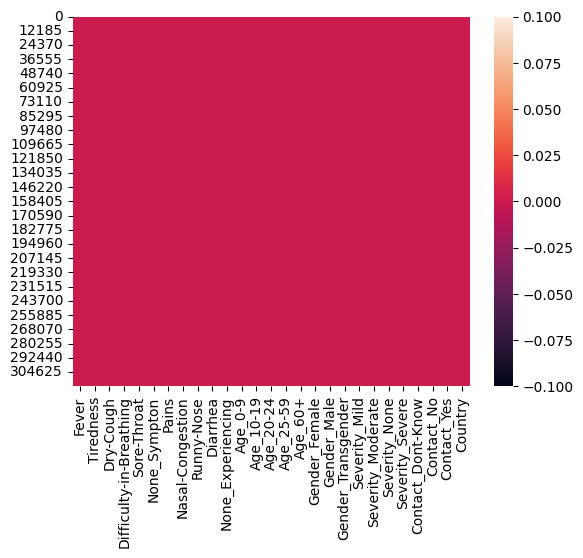

In [55]:
#Mapa de Calor

sns.heatmap(df.isnull())

In [56]:
#Cantidad de Nulos

null = df.isnull().sum()
null

Fever                      0
Tiredness                  0
Dry-Cough                  0
Difficulty-in-Breathing    0
Sore-Throat                0
None_Sympton               0
Pains                      0
Nasal-Congestion           0
Runny-Nose                 0
Diarrhea                   0
None_Experiencing          0
Age_0-9                    0
Age_10-19                  0
Age_20-24                  0
Age_25-59                  0
Age_60+                    0
Gender_Female              0
Gender_Male                0
Gender_Transgender         0
Severity_Mild              0
Severity_Moderate          0
Severity_None              0
Severity_Severe            0
Contact_Dont-Know          0
Contact_No                 0
Contact_Yes                0
Country                    0
dtype: int64

In [57]:
#Nombre de las columnas

df.columns

Index(['Fever', 'Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing',
       'Sore-Throat', 'None_Sympton', 'Pains', 'Nasal-Congestion',
       'Runny-Nose', 'Diarrhea', 'None_Experiencing', 'Age_0-9', 'Age_10-19',
       'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Female', 'Gender_Male',
       'Gender_Transgender', 'Severity_Mild', 'Severity_Moderate',
       'Severity_None', 'Severity_Severe', 'Contact_Dont-Know', 'Contact_No',
       'Contact_Yes', 'Country'],
      dtype='object')

In [58]:
#Eliminar las columnas que no son necesarias


df.drop(['Contact_Dont-Know', 'Contact_No', 'Contact_Yes', 'Country', 'Severity_Mild', 'Severity_Moderate', 'Severity_None', 'None_Experiencing', 'Age_0-9', 'Age_10-19', 'Age_20-24', 'Age_25-59', 'Gender_Female', 'Gender_Male', 'Gender_Transgender', 'None_Sympton'], axis = 1, inplace = True)
df

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,Age_60+,Severity_Severe
0,1,1,1,1,1,1,1,1,1,0,0
1,1,1,1,1,1,1,1,1,1,0,0
2,1,1,1,1,1,1,1,1,1,0,0
3,1,1,1,1,1,1,1,1,1,0,0
4,1,1,1,1,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,0,0,0,0,1,1
316796,0,0,0,0,0,0,0,0,0,1,1
316797,0,0,0,0,0,0,0,0,0,1,0
316798,0,0,0,0,0,0,0,0,0,1,0


In [59]:
#Separación de datos de entrenamiento y prueba

train, test = train_test_split(df, test_size = 0.3, random_state=0)
pred = test.copy()
x_train = train.iloc[:, :19].values
x_test = test.iloc[:, :19].values

y_train = train.iloc[:, -1].values
y_test = test.iloc[:, -1].values

In [60]:
#Regresión Logística

model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)

LogisticRegression()

In [61]:
#Predicción

y_pred_lr = model_lr.predict(x_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71256
           1       1.00      1.00      1.00     23784

    accuracy                           1.00     95040
   macro avg       1.00      1.00      1.00     95040
weighted avg       1.00      1.00      1.00     95040

[[71256     0]
 [    0 23784]] 



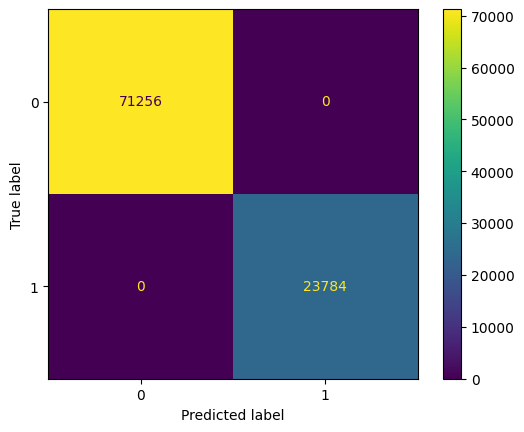

In [62]:
#Precisión del Modelo

print(classification_report(y_test, y_pred_lr))

print(confusion_matrix(y_test, y_pred_lr), '\n')
cm = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_lr))
cm.plot()

In [63]:
#Predicciones 

pred['prediction'] = y_pred_lr
pred

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,Age_60+,Severity_Severe,prediction
285440,1,1,1,0,0,0,1,1,1,0,1,1
61174,0,0,0,0,0,0,1,1,1,1,0,0
111620,0,0,0,1,0,0,1,0,0,0,1,1
44926,1,0,0,0,0,1,0,0,0,0,0,0
192227,1,1,1,1,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
417,1,1,0,0,0,1,1,1,0,0,0,0
66946,0,0,1,0,0,1,1,1,0,0,0,0
58871,0,0,0,1,0,0,0,0,0,1,0,0
92223,0,0,1,1,0,0,0,1,1,1,0,0


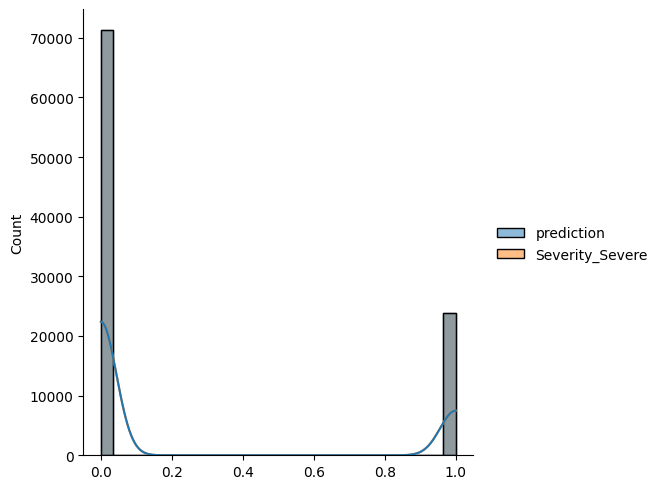

In [64]:
#Grafico de Distribuciones

sns.displot(pred[['prediction', 'Severity_Severe']], kde=True)

<Axes: ylabel='Density'>

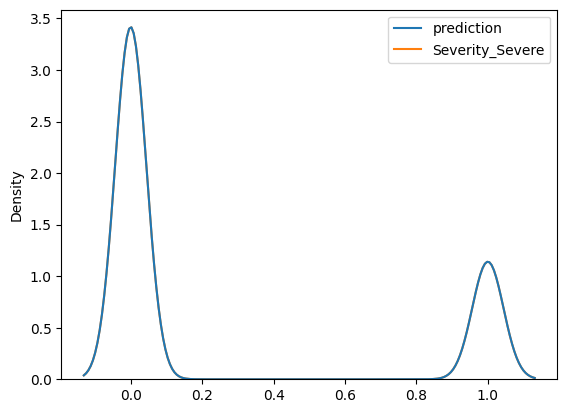

In [65]:
#Grafico de dnesidad de probabilidades

sns.kdeplot(pred[['prediction', 'Severity_Severe']])